In [80]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from scipy import stats
# For Logistic Regression good for Interpretability
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [31]:
# 2. Load the dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\AI\heart_attack_prediction_india.csv')

In [33]:
# 3. Basic data overview
print("Dataset shape:", df.shape)
print("First 5 rows:")
display(df.head())
print("Missing values per column:")
display(df.isnull().sum())

Dataset shape: (10000, 26)
First 5 rows:


Patient_ID        State_Name  Age  Gender  Diabetes  Hypertension  Obesity  \
0           1         Rajasthan   42  Female         0             0        1   
1           2  Himachal Pradesh   26    Male         0             0        0   
2           3             Assam   78    Male         0             0        1   
3           4            Odisha   58    Male         1             0        1   
4           5         Karnataka   22    Male         0             0        0   

   Smoking  Alcohol_Consumption  Physical_Activity  ...  Diastolic_BP  \
0        1                    0                  0  ...           119   
1        0                    1                  1  ...           115   
2        0                    0                  1  ...           117   
3        0                    0                  1  ...            65   
4        0                    0                  1  ...           109   

   Air_Pollution_Exposure  Family_History  Stress_Level  Healthcare_Access  \
0                       1               0             4                  0   
1                       0               0             7                  0   
2                       0               1            10                  1   
3                       0               0             1                  1   
4                       0               0             9                  0   

   Heart_Attack_History  Emergency_Response_Time  Annual_Income  \
0                     0                      157         611025   
1                     0                      331         174527   
2                     0                      186        1760112   
3                     1                      324        1398213   
4                     0                      209          97987   

   Health_Insurance  Heart_Attack_Risk  
0                 0                  0  
1                 0                  0  
2                 1                  0  
3                 0                  0  
4                 0                  1  

[5 rows x 26 columns]

Missing values per column:


Patient_ID                 0
State_Name                 0
Age                        0
Gender                     0
Diabetes                   0
Hypertension               0
Obesity                    0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity          0
Diet_Score                 0
Cholesterol_Level          0
Triglyceride_Level         0
LDL_Level                  0
HDL_Level                  0
Systolic_BP                0
Diastolic_BP               0
Air_Pollution_Exposure     0
Family_History             0
Stress_Level               0
Healthcare_Access          0
Heart_Attack_History       0
Emergency_Response_Time    0
Annual_Income              0
Health_Insurance           0
Heart_Attack_Risk          0
dtype: int64

In [45]:
# # 4. Handle missing values
# # Fill numerical columns with mean
# num_cols = df.select_dtypes(include=['float64', 'int64']).columns
# # for col in num_cols:# Handle missing values
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numerical columns with mean
df[num_cols] = df[num_cols].apply(lambda col: col.fillna(col.mean()))


# #     df[col].fillna(df[col].mean(), inplace=True)
# for col in num_cols:
#     df[col].fillna(df[col].mean(), inplace=True)

In [49]:
# 5. Encode categorical variables
# Label Encoding for binary categories, One-Hot for others
label_enc = LabelEncoder()
for col in cat_cols:
    if df[col].nunique() == 2:
        df[col] = label_enc.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

In [17]:
# 6. Normalize/Standardize numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [53]:
# Fill categorical columns with mode
df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

In [25]:
# 7. Detect and remove outliers (Z-score method)
z_scores = np.abs(stats.zscore(df[num_cols]))
df = df[(z_scores < 3).all(axis=1)]

print("Dataset shape after outlier removal:", df.shape)

Dataset shape after outlier removal: (9071, 52)


In [113]:
# Import necessary libraries for EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

In [115]:
# Define target and features (update 'output' with actual target column name)
target_column = 'output'  # Change this if your target column is named differently
X = df.drop(target_column, axis=1)
y = df[target_column]

KeyError: "['output'] not found in axis"

In [60]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = (r'C:\Users\HP\Desktop\AI\heart_attack_prediction_india.csv')
# 2. Load the dataset
# df = pd.read_csv(r'C:\Users\HP\Desktop\AI\heart_attack_prediction_india.csv')
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# 1. Data Cleaning & Preprocessing

# Handle missing values
# Example: Using mean imputation for numerical features and mode for categorical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute missing values
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

# Check for any remaining missing values
print(data.isnull().sum())

# Encode categorical variables
# Using One-Hot Encoding for categorical variables
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Standardize/normalize numerical features
# You can choose either StandardScaler or MinMaxScaler
scaler = StandardScaler()  # or MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Detect and handle outliers (optional)
# Example: Using IQR method to detect outliers
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
data = data[~((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Split the dataset into train, validation, and test sets
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Display the shapes of the datasets
print(f'Train set shape: {train_data.shape}')
print(f'Validation set shape: {val_data.shape}')
print(f'Test set shape: {test_data.shape}')

   Patient_ID        State_Name  Age  Gender  Diabetes  Hypertension  Obesity  \
0           1         Rajasthan   42  Female         0             0        1   
1           2  Himachal Pradesh   26    Male         0             0        0   
2           3             Assam   78    Male         0             0        1   
3           4            Odisha   58    Male         1             0        1   
4           5         Karnataka   22    Male         0             0        0   

   Smoking  Alcohol_Consumption  Physical_Activity  ...  Diastolic_BP  \
0        1                    0                  0  ...           119   
1        0                    1                  1  ...           115   
2        0                    0                  1  ...           117   
3        0                    0                  1  ...            65   
4        0                    0                  1  ...           109   

   Air_Pollution_Exposure  Family_History  Stress_Level  Healthcare_Access

ValueError: num must be an integer with 1 <= num <= 9, not 10

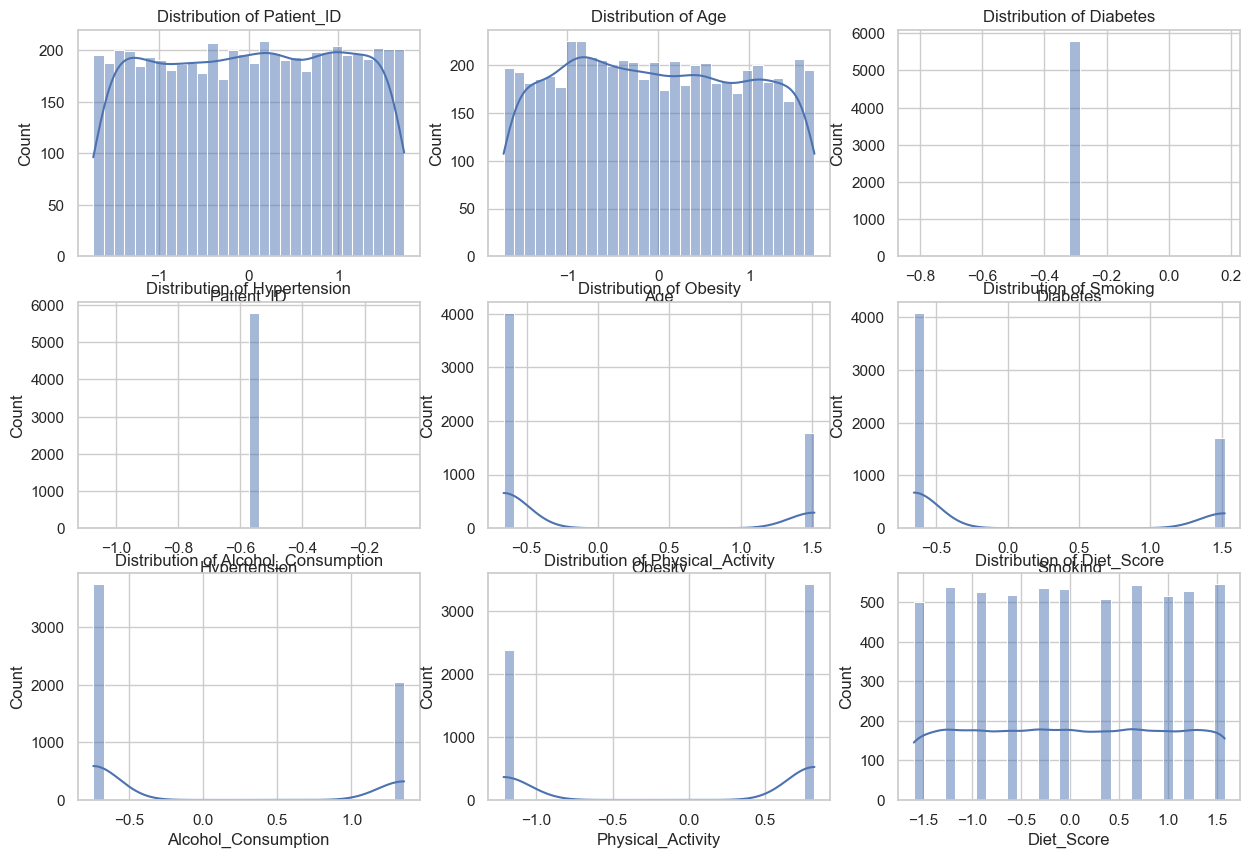

In [62]:
# Import necessary libraries for EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# 2. Exploratory Data Analysis (EDA)

# Analyze feature distributions
# Histograms for numerical features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  # Adjust the number of rows and columns as needed
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Identify correlations
correlation_matrix = data.corr()

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

# Understand relationships between target and predictors
# Assuming 'target' is the name of your target variable
target_variable = 'target'  # Replace with your actual target variable name

# Pairplot to visualize relationships
sns.pairplot(data, hue=target_variable)
plt.title('Pairplot of Features with Target Variable')
plt.show()

# Check for class imbalance
if data[target_variable].dtype == 'object' or data[target_variable].nunique() < 10:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=target_variable, data=data)
    plt.title('Class Distribution')
    plt.xlabel(target_variable)
    plt.ylabel('Count')
    plt.show()
else:
    print("Target variable is not categorical or has too many unique values to visualize class distribution.")

In [9]:
# Logistic Regression – good for interpretability
# 2. Load the dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\AI\heart_attack_prediction_india.csv')

In [43]:
# Step 3: Initial Exploration
print(df.head())
print(df.info())

         State_Name  Age  Gender  Diabetes  Hypertension  Obesity  Smoking  \
0         Rajasthan   42  Female         0             0        1        1   
1  Himachal Pradesh   26    Male         0             0        0        0   
2             Assam   78    Male         0             0        1        0   
3            Odisha   58    Male         1             0        1        0   
4         Karnataka   22    Male         0             0        0        0   

   Alcohol_Consumption  Physical_Activity  Diet_Score  ...  Diastolic_BP  \
0                    0                  0           9  ...           119   
1                    1                  1           4  ...           115   
2                    0                  1           6  ...           117   
3                    0                  1           9  ...            65   
4                    0                  1           5  ...           109   

   Air_Pollution_Exposure  Family_History  Stress_Level  Healthcare_Access

In [35]:
# Strip any whitespace from column names
df.rename(columns=lambda x: x.strip(), inplace=True)

In [39]:
# Drop the 'Patient_ID' column if it exists
df.drop(["Patient_ID"], axis=1, inplace=True, errors="ignore")

In [41]:
# Print column names after dropping
print("Columns after dropping 'Patient_ID':")
print(df.columns)

Columns after dropping 'Patient_ID':
Index(['State_Name', 'Age', 'Gender', 'Diabetes', 'Hypertension', 'Obesity',
       'Smoking', 'Alcohol_Consumption', 'Physical_Activity', 'Diet_Score',
       'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level', 'HDL_Level',
       'Systolic_BP', 'Diastolic_BP', 'Air_Pollution_Exposure',
       'Family_History', 'Stress_Level', 'Healthcare_Access',
       'Heart_Attack_History', 'Emergency_Response_Time', 'Annual_Income',
       'Health_Insurance', 'Heart_Attack_Risk'],
      dtype='object')


In [45]:
# Split features and target
X = df.drop("Heart_Attack_Risk", axis=1)
y = df["Heart_Attack_Risk"]

In [47]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Step 6: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Step 1: One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

In [53]:
# Step 2: Split features and target
X = df.drop("Heart_Attack_Risk", axis=1)
y = df["Heart_Attack_Risk"]

In [55]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# Step 5: Train the Model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [69]:
# Step 6: Make Predictions on Test Data
y_pred = model.predict(X_test_scaled)

In [59]:
print(X_train.dtypes)

Age                             int64
Diabetes                        int64
Hypertension                    int64
Obesity                         int64
Smoking                         int64
Alcohol_Consumption             int64
Physical_Activity               int64
Diet_Score                      int64
Cholesterol_Level               int64
Triglyceride_Level              int64
LDL_Level                       int64
HDL_Level                       int64
Systolic_BP                     int64
Diastolic_BP                    int64
Air_Pollution_Exposure          int64
Family_History                  int64
Stress_Level                    int64
Healthcare_Access               int64
Heart_Attack_History            int64
Emergency_Response_Time         int64
Annual_Income                   int64
Health_Insurance                int64
State_Name_Arunachal Pradesh     bool
State_Name_Assam                 bool
State_Name_Bihar                 bool
State_Name_Chhattisgarh          bool
State_Name_G

In [71]:
# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.71


In [92]:
# 2. Detailed Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# print(classification_report(y_test, y_pred, zero_division=1))
# print("Predictions on Test Set:", y_pred)
# print(confusion_matrix(y_test, y_pred))


Classification Report:


NameError: name 'y_test' is not defined

In [77]:
# 3. Confusion Matrix (Optional for deeper insights)
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[1411    0]
 [ 589    0]]


In [94]:
# KNN CLASSIFIER FOR HEART ATTACK PREDICTION
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
# For cleaner plots
sns.set(style="whitegrid")

In [98]:
# 2. Load the dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\AI\heart_attack_prediction_india.csv')

In [100]:
# 📊 Step 3: Data Exploration
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Basic statistics
df.describe()

Dataset Shape: (10000, 26)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               10000 non-null  int64 
 1   State_Name               10000 non-null  object
 2   Age                      10000 non-null  int64 
 3   Gender                   10000 non-null  object
 4   Diabetes                 10000 non-null  int64 
 5   Hypertension             10000 non-null  int64 
 6   Obesity                  10000 non-null  int64 
 7   Smoking                  10000 non-null  int64 
 8   Alcohol_Consumption      10000 non-null  int64 
 9   Physical_Activity        10000 non-null  int64 
 10  Diet_Score               10000 non-null  int64 
 11  Cholesterol_Level        10000 non-null  int64 
 12  Triglyceride_Level       10000 non-null  int64 
 13  LDL_Level                10000 non-null  int64 
 1

Patient_ID           Age      Diabetes  Hypertension       Obesity  \
count  10000.00000  10000.000000  10000.000000   10000.00000  10000.000000   
mean    5000.50000     49.394900      0.092900       0.24690      0.303700   
std     2886.89568     17.280301      0.290307       0.43123      0.459878   
min        1.00000     20.000000      0.000000       0.00000      0.000000   
25%     2500.75000     35.000000      0.000000       0.00000      0.000000   
50%     5000.50000     49.000000      0.000000       0.00000      0.000000   
75%     7500.25000     64.000000      0.000000       0.00000      1.000000   
max    10000.00000     79.000000      1.000000       1.00000      1.000000   

            Smoking  Alcohol_Consumption  Physical_Activity    Diet_Score  \
count  10000.000000         10000.000000       10000.000000  10000.000000   
mean       0.301400             0.352800           0.595800      5.021700   
std        0.458889             0.477865           0.490761      3.156394   
min        0.000000             0.000000           0.000000      0.000000   
25%        0.000000             0.000000           0.000000      2.000000   
50%        0.000000             0.000000           1.000000      5.000000   
75%        1.000000             1.000000           1.000000      8.000000   
max        1.000000             1.000000           1.000000     10.000000   

       Cholesterol_Level  ...  Diastolic_BP  Air_Pollution_Exposure  \
count       10000.000000  ...  10000.000000            10000.000000   
mean          224.753000  ...     89.312000                0.403600   
std            43.359172  ...     17.396486                0.490644   
min           150.000000  ...     60.000000                0.000000   
25%           187.000000  ...     74.000000                0.000000   
50%           226.000000  ...     89.000000                0.000000   
75%           262.000000  ...    104.000000                1.000000   
max           299.000000  ...    119.000000                1.000000   

       Family_History  Stress_Level  Healthcare_Access  Heart_Attack_History  \
count    10000.000000  10000.000000       10000.000000          10000.000000   
mean         0.311300      5.518800           0.311000              0.152500   
std          0.463048      2.866264           0.462926              0.359523   
min          0.000000      1.000000           0.000000              0.000000   
25%          0.000000      3.000000           0.000000              0.000000   
50%          0.000000      6.000000           0.000000              0.000000   
75%          1.000000      8.000000           1.000000              0.000000   
max          1.000000     10.000000           1.000000              1.000000   

       Emergency_Response_Time  Annual_Income  Health_Insurance  \
count             10000.000000   1.000000e+04      10000.000000   
mean                206.383400   1.022062e+06          0.344700   
std                 112.391711   5.605978e+05          0.475294   
min                  10.000000   5.035300e+04          0.000000   
25%                 110.000000   5.357838e+05          0.000000   
50%                 206.000000   1.021383e+06          0.000000   
75%                 304.000000   1.501670e+06          1.000000   
max                 399.000000   1.999714e+06          1.000000   

       Heart_Attack_Risk  
count       10000.000000  
mean            0.300700  
std             0.458585  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             1.000000  
max             1.000000  

[8 rows x 24 columns]

In [110]:
# 🧹 Step 4: Data Cleaning (if needed)
# Drop rows with missing values (if any)
df = df.dropna()

# Show column names
df.columns

# print(df.columns.tolist())


Index(['Patient_ID', 'State_Name', 'Age', 'Gender', 'Diabetes', 'Hypertension',
       'Obesity', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity',
       'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level',
       'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Air_Pollution_Exposure',
       'Family_History', 'Stress_Level', 'Healthcare_Access',
       'Heart_Attack_History', 'Emergency_Response_Time', 'Annual_Income',
       'Health_Insurance', 'Heart_Attack_Risk'],
      dtype='object')

In [65]:
# # 🎯 Step 5: Define Features and Target
# # Change 'output' to your actual target column if different
# target_column = "output"
# X = df.drop(columns=[target_column])
# y = df[target_column]

# target_column = "outcome"
# X = df.drop(columns=[target_column])
# X = df.drop(columns=[target_column], errors='ignore')
# y = df[target_column]
# df.columns = df.columns.str.strip() 
# # print(df.columns.tolist())
# print(df.columns.outcome())

In [1]:
# # 🎯 Step 5: Define Features and Target
# # Change 'outcome' to your actual target column if different
# target_column = "Outcome"  # Ensure this is the correct target column name

# # Strip any whitespace from column names
# df.columns = df.columns.str.strip()

# # Check if the target column exists
# if target_column in df.columns:
#     X = df.drop(columns=[target_column])
#     y = df[target_column]
# else:
#     print(f"Target column '{target_column}' not found in DataFrame.")

# # Print the feature and target shapes
# print("Features shape:", X.shape)
# print("Target shape:", y.shape)

# # Optionally, print the column names
# print("Column names:", df.columns.tolist())
# 🎯 Step 5: Define Features and Target
# Change 'output' to your actual target column if different
# target_column = "output"
# X = df.drop(columns=[target_column])
# y = df[target_column]

In [ ]:
# 🔀 Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [47]:
#SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_repor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
# 2. Load the dataset
data = pd.read_csv(r'C:\Users\HP\Desktop\AI\heart_attack_prediction_india.csv')

In [17]:
# Step 2: Drop ID column (not useful for prediction)
data = data.drop(columns=['Patient_ID'])

In [19]:
# Step 3: Encode categorical variables
categorical_columns = [
    'State_Name', 'Gender', 'Smoking', 'Alcohol_Consumption',
    'Physical_Activity', 'Health_Insurance', 'Family_History',
    'Healthcare_Access', 'Heart_Attack_History'
]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [21]:
# Step 4: Encode target variable
target_encoder = LabelEncoder()
data['Heart_Attack_Risk'] = target_encoder.fit_transform(data['Heart_Attack_Risk'])

In [23]:
# Step 5: Separate features and target
X = data.drop(columns=['Heart_Attack_Risk'])
y = data['Heart_Attack_Risk']

In [25]:
# Step 6: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [29]:
# Step 8: Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

SVC()

In [31]:
# Step 9: Make predictions
y_pred = svm_model.predict(X_test)

In [61]:
# Step 10: Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, target_names=target_encoder.classes_))
# Ensure that target_names is an iterable (list or array)
# print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, target_names=list(target_encoder.classes_)))
print("Classes:", target_encoder.classes_)
print("Type of classes:", type(target_encoder.classes_))


✅ Accuracy: 0.7055

📊 Confusion Matrix:
 [[1411    0]
 [ 589    0]]
Classes: [0 1]
Type of classes: <class 'numpy.ndarray'>


In [63]:
# Convert to string if they are integers
target_names = [str(label) for label in target_encoder.classes_]
print("Target Names:", target_names)

Target Names: ['0', '1']


In [67]:
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


📄 Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83      1411
           1       0.00      0.00      0.00       589

    accuracy                           0.71      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.50      0.71      0.58      2000



C:\Log\yx\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Log\yx\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Log\yx\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
#SVM HYPERPARAMETER TUNING

In [82]:
# DECISION TREEE
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [86]:
# 2. Load the dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\AI\heart_attack_prediction_india.csv')

In [88]:
# 3. Drop non-informative columns
df = df.drop(columns=['Patient_ID'])

In [90]:
# 4. Encode Categorical Columns
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [92]:
# 5. Define Features and Target
X = df.drop('Heart_Attack_Risk', axis=1)
y = df['Heart_Attack_Risk']

In [94]:
# 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# 7. Build and Train the Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [98]:
# 8. Predict and Evaluate
y_pred = model.predict(X_test)

In [100]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.579
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70      1411
           1       0.31      0.34      0.32       589

    accuracy                           0.58      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.59      0.58      0.58      2000



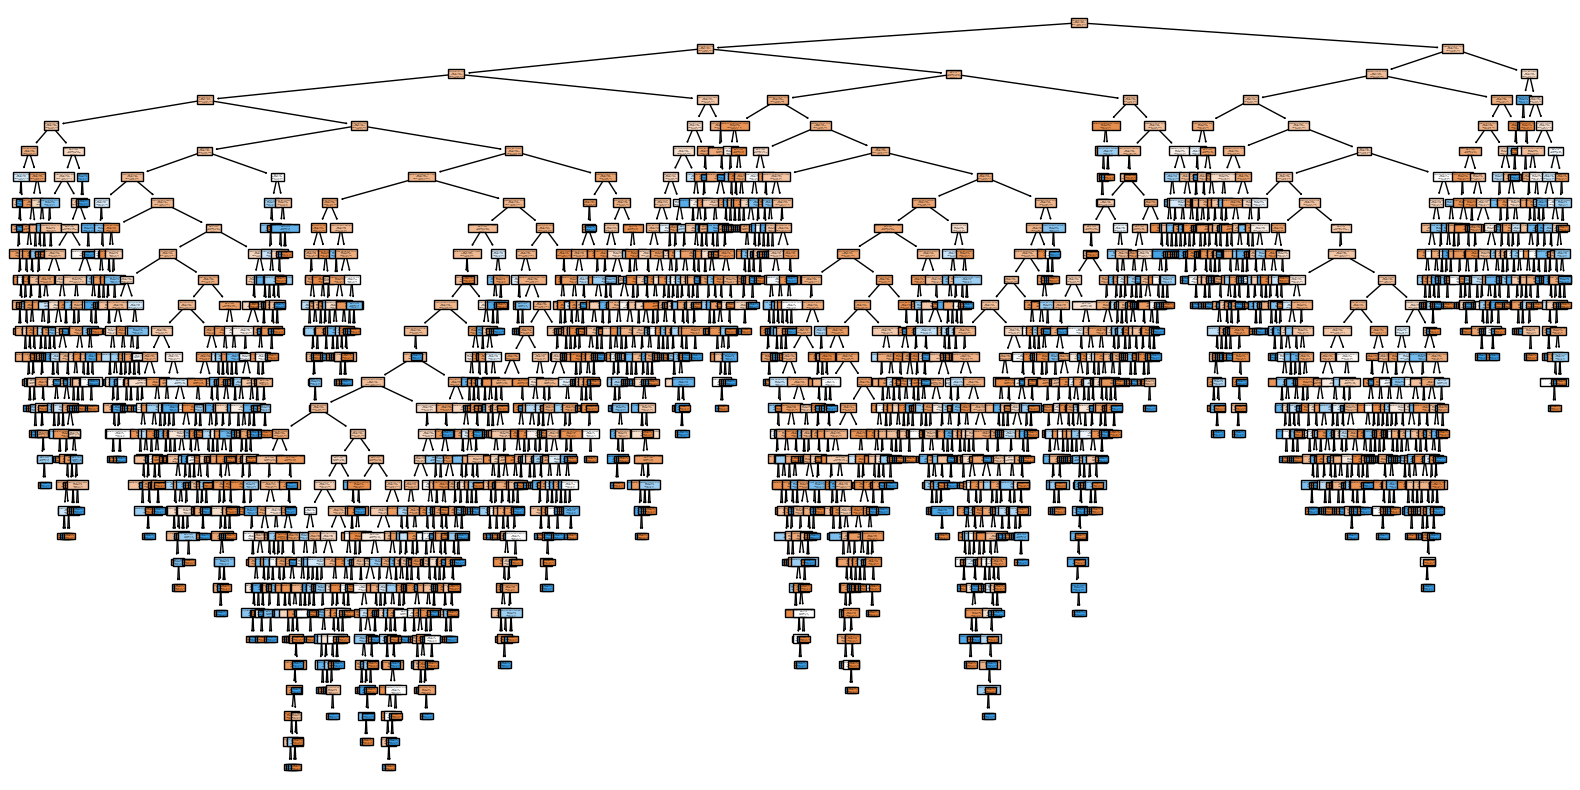

In [103]:
# 9. Visualize the Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_.astype(str), filled=True)
plt.show()

In [117]:
#LOGISTIC REGRESSION IN ML
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [119]:
file_path = r"C:\Users\HP\Desktop\AI\Final Assignment\heart_attack_prediction_india.csv"
df = pd.read_csv(file_path)

In [121]:
# 2️⃣ Drop unnecessary columns
df.drop(columns=["Patient_ID", "State_Name"], inplace=True)  # Removing non-relevant features

In [123]:
# 3️⃣ Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numerical NaNs with median
df.fillna(df.mode().iloc[0], inplace=True)  # Fill categorical NaNs with mode

In [125]:
# 4️⃣ Encode categorical variables
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})  # Convert Gender to binary
df["Health_Insurance"] = df["Health_Insurance"].map({"Yes": 1, "No": 0})
df["Heart_Attack_History"] = df["Heart_Attack_History"].map({"Yes": 1, "No": 0})

In [127]:
# 5️⃣ Define Features (X) and Target (y)
X = df.drop(columns=["Heart_Attack_Risk"])  # Features
y = df["Heart_Attack_Risk"]  # Target variable

In [143]:
# 6️⃣ Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [145]:
# 7️⃣ Apply SMOTE after ensuring no NaN values
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [137]:
# 8️⃣ Normalize numerical features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

NameError: name 'X_train_smote' is not defined